# Chapter 5, Example 3a
## Three-way data split on Iris data

In [1]:
import torch
from torch import nn

from sklearn import datasets

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lr = 0.1
no_epochs = 100

no_labels = 3
no_features = 4
hidden_units = [2, 4, 6, 8, 10, 12]

seed = 10
torch.manual_seed(seed)
np.random.seed(seed)

In [3]:
no_inputs = 4
no_outputs = 3

# input data
iris = datasets.load_iris()
iris.data -= np.mean(iris.data, axis=0)

no_data = len(iris.data)

X = iris.data

# convert the targets into one-hot matrix
Y = np.zeros((no_data, no_outputs))
for i in range(no_data):
    Y[i, iris.target[i]] = 1
    
print(np.shape(X))
print(np.shape(Y))

(150, 4)
(150, 3)


In [4]:
class FFN(nn.Module):
    def __init__(self, no_features, hidden_units, no_labels):
        super().__init__()
        self.relu_stack = nn.Sequential(
            nn.Linear(no_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, no_labels),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        logits = self.relu_stack(x)
        return logits

In [5]:
idx = np.arange(no_data)
np.random.shuffle(idx)
X, Y = X[idx], Y[idx]

x_train, y_train = X[:50], Y[:50]
x_valid, y_valid = X[50:100], Y[50:100] 
x_test, y_test = X[100:], Y[100:]

acc = []
loss = []
for no_hidden in hidden_units:
        
    model = FFN(no_inputs, no_hidden, no_outputs)
    
    loss_fn = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    for epoch in range(no_epochs):
        pred = model(torch.tensor(x_train, dtype=torch.float))
        loss_ = loss_fn(pred, torch.tensor(y_train, dtype=torch.float))
    
        # Backpropagation
        optimizer.zero_grad()
        loss_.backward()
        optimizer.step()
    
    pred = model(torch.tensor(x_valid, dtype=torch.float))
    acc_ = (pred.argmax(dim=1) == torch.tensor(y_valid, dtype=torch.float).argmax(dim=1)).type(torch.float).mean()
    
    acc.append(acc_.item())
    
    print('hidden units %d, mean accuracy = %g'% (no_hidden, acc_.item()))
    
print(acc)

hidden units 2, mean accuracy = 0.5
hidden units 4, mean accuracy = 0.68
hidden units 6, mean accuracy = 0.8
hidden units 8, mean accuracy = 0.88
hidden units 10, mean accuracy = 0.82
hidden units 12, mean accuracy = 0.82
[0.5, 0.6800000071525574, 0.800000011920929, 0.8799999952316284, 0.8199999928474426, 0.8199999928474426]


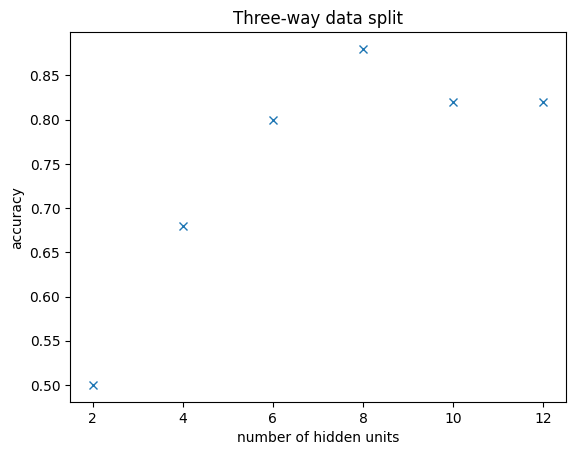

In [6]:
plt.figure(1)
plt.plot(hidden_units, acc, marker = 'x', linestyle = 'None')
plt.xlabel('number of hidden units')
plt.ylabel('accuracy')
plt.title('Three-way data split')
plt.show()

In [7]:
no_hidden = hidden_units[np.argmax(acc)]
print("optimum hidden neurons %g"%no_hidden)

optimum hidden neurons 8


In [8]:
x_train, y_train = X[:100], Y[:100]
    
model = FFN(no_inputs, no_hidden, no_outputs)
    
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
for epoch in range(no_epochs):
    pred = model(torch.tensor(x_train, dtype=torch.float))
    loss = loss_fn(pred, torch.tensor(y_train, dtype=torch.float))
    
    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
pred = model(torch.tensor(x_test, dtype=torch.float))
acc_ = (pred.argmax(1) == torch.tensor(y_test, dtype=torch.float).argmax(1)).type(torch.float).mean()

print('hidden units %d, mean accuracy = %g'% (no_hidden, acc_))

hidden units 8, mean accuracy = 0.72
